<h2>Table of Contents</h2>	

<ol>
    <li>Schematic of the whole setup</li>
    <li>Finesse basecode for Power Recycled Michelson Interferometer</li>
    <li>Detectors</li>
    <li>Microscopic Tuning of MI ITMX</li>
    <li>Tuning PRM over one wavelength</li>
    <li>Schnupp Asymmetry</li>
</ol>

In [89]:

from pykat import finesse        
from pykat.commands import *     
import numpy as np               
import matplotlib.pyplot as plt  
import scipy                     
from IPython import display

%matplotlib inline               

pykat.init_pykat_plotting(dpi=90)

<h3>Schematic of the whole setup</h3>   


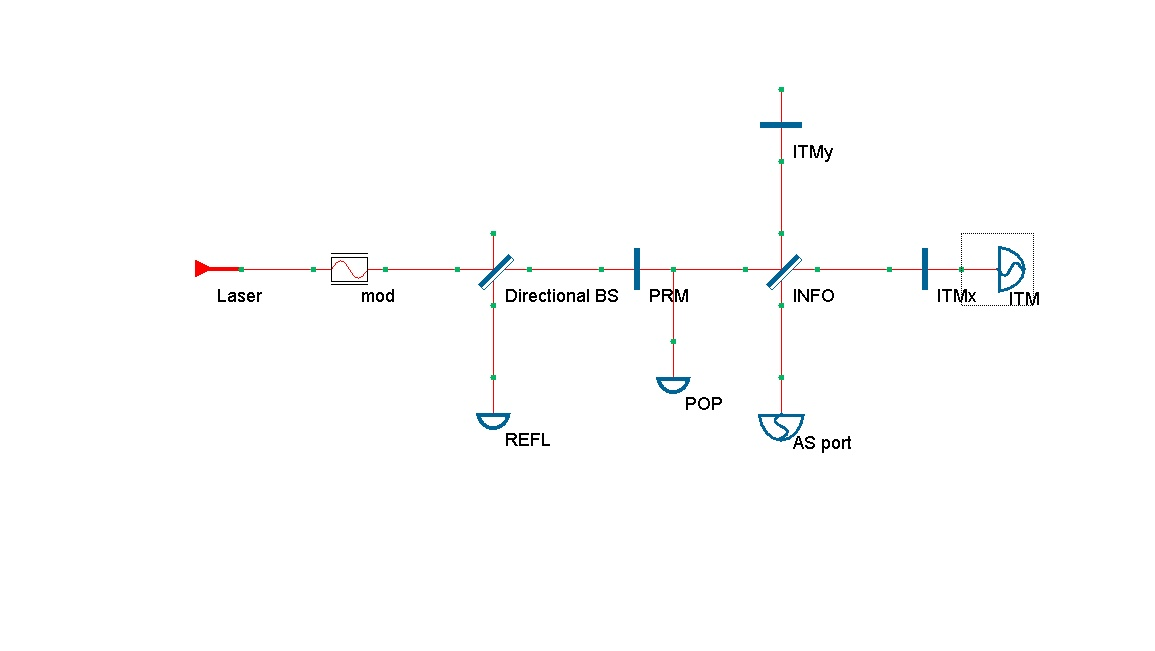

In [90]:
display.Image("C:/Users/Parivesh/Desktop/prm.jpg")

<h3>Finesse basecode for Power Recycled Michelson Interferometer</h3>

In [91]:
basecode = """
#10 watt input laser
l laser 10 0 n1

s smod 1 n1 n2
mod eom 7e6 0.3 1 pm 0 n2 n3  
s s0 1 n3 n4

dbs isol n4 dump n6 n7 
s isl_cav 1 n6 n8

#power recycling mirror
m1 PRM 0.03 0 0 n8 n9

#power recycling cavity
s PRC_cav 5 n9 n10

bs bs2 0.5 0.5 45 0 n10 n11 n12 n13

#y-arm
s sy 5 n11 n16
m1 itmy 0.014 0 0 n16 y_tra

#x-arm
s sx 5 n12 n14
m1 itmx 0.014 0 0 n14 x_tra



#DC detectors

pd0 AS_dc n13
pd0 REFL_dc n7
pd0 PRC_dc n9
pd0 tran_x x_tra

#Amp. detectors

ad PRC_c 0 n9
ad PRC_sb 7e6 n9
ad AS_c 0 n13
ad AS_sb 7e6 n13
ad REFL_c 0 n7
ad REFL_sb 7e6 n7

#RF detectors

pd1 REFL_I 7e6 100 n7
pd1 REFL_Q 7e6 10 n7
pd1 AS_I 7e6 100 n13
pd1 AS_Q 7e6 10 n13

"""

basekat = finesse.kat() 
basekat.verbose = False
basekat.parse(basecode)

<h3>Microscopic Tuning of MI ITMX</h3>   

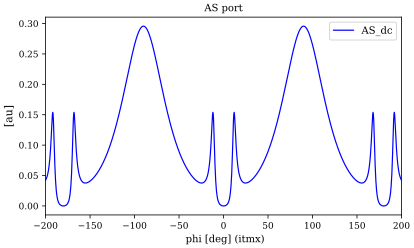

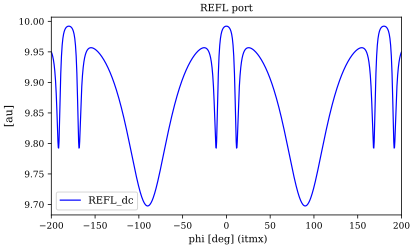

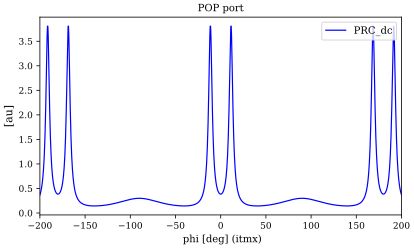

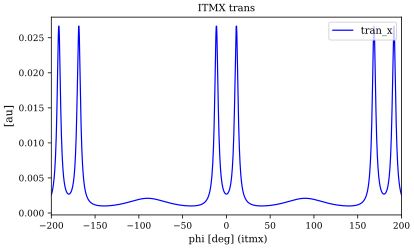

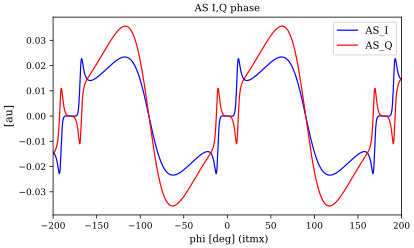

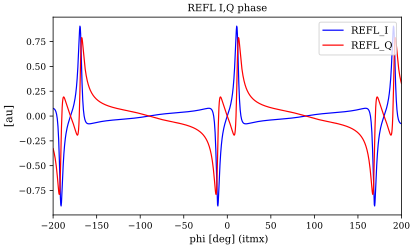

In [92]:
kat1= basekat.deepcopy()
kat1.parse("xaxis itmx phi lin -200 200 1000")
out1 = kat1.run()
out1.plot(["AS_dc"],title="AS port")
out1.plot(["REFL_dc"],title="REFL port")
out1.plot(["PRC_dc"],title="POP port")
out1.plot(["tran_x"],title="ITMX trans")
out1.plot(["AS_I","AS_Q",],title="AS I,Q phase")
out1.plot(["REFL_I","REFL_Q",],title="REFL I,Q phase")

<h3>Tuning PRM over one wavelength</h3>   

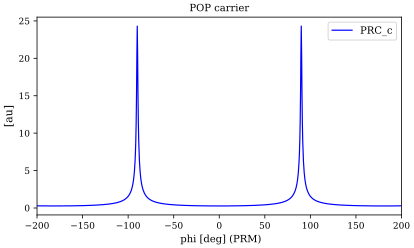

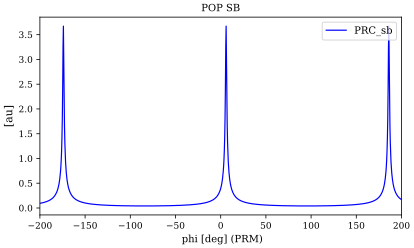

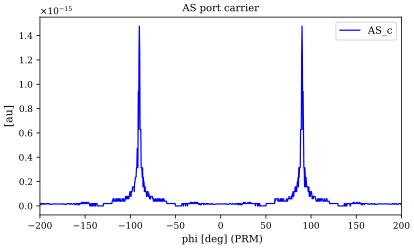

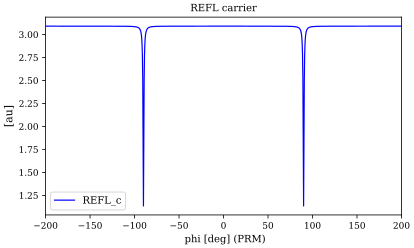

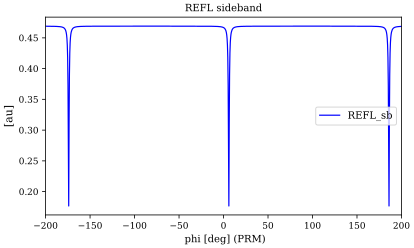

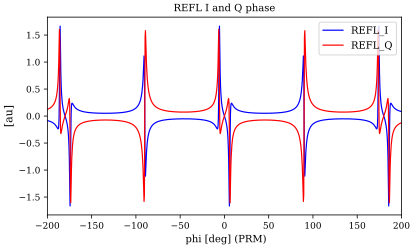

In [93]:
kat2= basekat.deepcopy()
kat2.parse("xaxis PRM phi lin -200 200 1000")
out2 = kat2.run()
out2.plot(["PRC_c"],title="POP carrier")
out2.plot(["PRC_sb"],title="POP SB")
out2.plot(["AS_c"],title="AS port carrier")
out2.plot(["REFL_c"],title="REFL carrier")
out2.plot(["REFL_sb"],title="REFL sideband")
out2.plot(["REFL_I","REFL_Q",],title="REFL I and Q phase")

<h3>Schnupp Asymmetry</h3>   

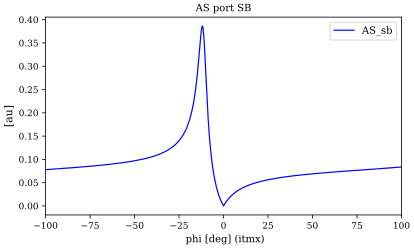

In [94]:
kat3= basekat.deepcopy()
kat3.parse("xaxis itmx phi lin -100 100 1000")
out3 = kat3.run()
out3.plot(["AS_sb"],title="AS port SB")